In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

#importing packages for the prediction of time-series data
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [65]:
import pandas as pd
import numpy as np
import math
import datetime as dt

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [66]:
import pandas as pd
import numpy as np

In [67]:
path = "/content/drive/MyDrive/Tiny.csv"
data = pd.read_csv(path, encoding="latin-1",sep=";")
data

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.0,1002.0
361,28/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,...,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6


In [85]:
msv = 2151260838
col = msv%15 + 1
col2 = msv%15 +2
data_4_5 = data[[str(col),str(col2)]]
data_4_5.head(5)

,4,5
0,964.4,964.4
1,1019.7,1019.7
2,988.4,988.4
3,1002.0,1002.0
4,1061.5,1061.5


In [5]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [6]:
# Lấy dữ liệu từ cột được chọn
selected_data = data.iloc[:, col]

TÌm cụm tối ưu Kmeans


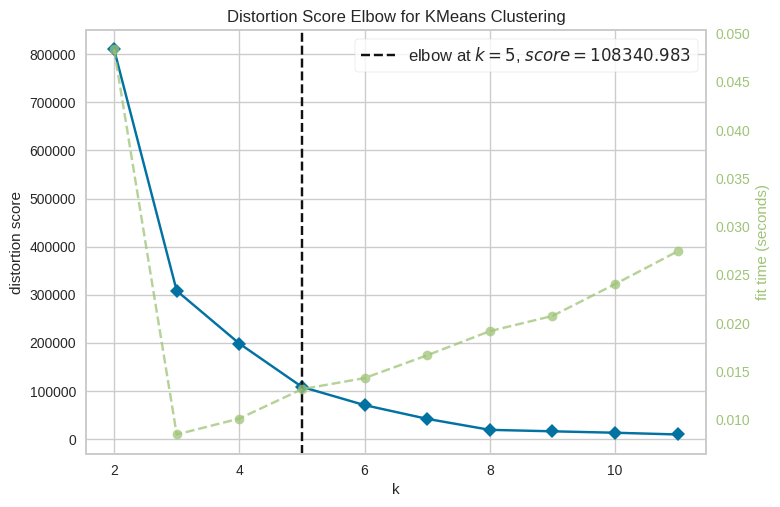

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from yellowbrick.cluster import KElbowVisualizer
print('TÌm cụm tối ưu Kmeans')
selected_data_2d = selected_data.values.reshape(-1, 1)
kmeans = KMeans(random_state=23, n_init=10)
Elbow_M = KElbowVisualizer(kmeans, k=(2, 12))
Elbow_M.fit(selected_data_2d)
Elbow_M.show()

In [8]:
k = 5
# Thực hiện Gaussian Mixture Model
gmm = GaussianMixture(n_components=k) # Số components có thể điều chỉnh
gmm.fit(selected_data.values.reshape(-1, 1))
gmm_labels = gmm.predict(selected_data.values.reshape(-1, 1))
# Thực hiện KMeans clustering
kmeans = KMeans(n_clusters=k, n_init=10) # Số clusters có thể điều chỉnh
kmeans.fit(selected_data.values.reshape(-1, 1))
kmeans_labels = kmeans.predict(selected_data.values.reshape(-1, 1))
# Thực hiện DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # Tham số có thể điều chỉnh
dbscan_labels = dbscan.fit_predict(selected_data.values.reshape(-1, 1))
# In ra kết quả của mỗi mô hình
print("Gaussian Mixture Model labels:")
print(gmm_labels)
print("\nKMeans labels:")
print(kmeans_labels)
print("\nDBSCAN labels:")
print(dbscan_labels)
# Mô tả kịch bản tách dữ liệu
print("\nKịch bản tách data:")
print("Dữ liệu được đọc từ tệp CSV 'Gia SMP va SMPcap 2021(Giá thị trường SMP).csv'.")
print(f"Chọn cột số {col} để phân tích.")
print("Sử dụng Gaussian Mixture Model với số components là 2, KMeans clustering với số clusters là 2, và DBSCAN để phân tích dữ liệu.")

Gaussian Mixture Model labels:
[2 1 1 1 3 3 3 3 3 2 1 3 3 3 3 3 1 3 3 3 3 3 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 3 1 1 1 1
 3 3 3 3 3 2 1 1 1 3 3 3 2 1 3 1 1 1 1 2 1 3 3 3 1 2 2 2 3 3 3 3 3 1 3 3 3
 3 3 3 2 3 3 3 3 2 2 2 3 3 3 1 1 1 2 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3
 1 1 3 1 1 1 1 2 2 1 3 3 3 3 1 1 1 2 1 1 3 3 1 2 1 1 3 3 3 2 2 2 1 2 2 2 2
 1 3 2 1 1 1 2 2 1 1 3 3 3 2 3 0 4 0 4 0 2 0 0 0 3 1 2 2 1 3 3 3 3 3 1 3 0
 0 0 0 0 0 4 4 0 0 0 0 3 3 0 0 3 3 1 2 1 1 1 2 1 3 1 3 3 3 3 0 3 2 3 3 1 1
 1 1 2 1 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 2 1 3 1 2 1 3 3 3 1 1 2 1 3 3 3 3 1
 2 1 1 1 1 1 1 2 1 3 1 1 1 1 2 1 1 3 3 3 1 2 3 3 3 3 3 3 2 1 3 1 1 1 2 2 2
 1 1 1 1 1 2 1 1 1 3 3 1 2 1 3 3 3 3 1 1 1 3 1 1 1 1 2 1 1 3 1 1]

KMeans labels:
[3 0 0 0 2 2 2 2 2 3 0 2 2 2 2 2 0 2 2 2 2 2 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 2 0 0 0 0
 2 2 2 2 2 3 0 0 0 2 2 2 3 0 2 0 0 0 0 3 0 2 2 2 0 3 3 3 2 2 2

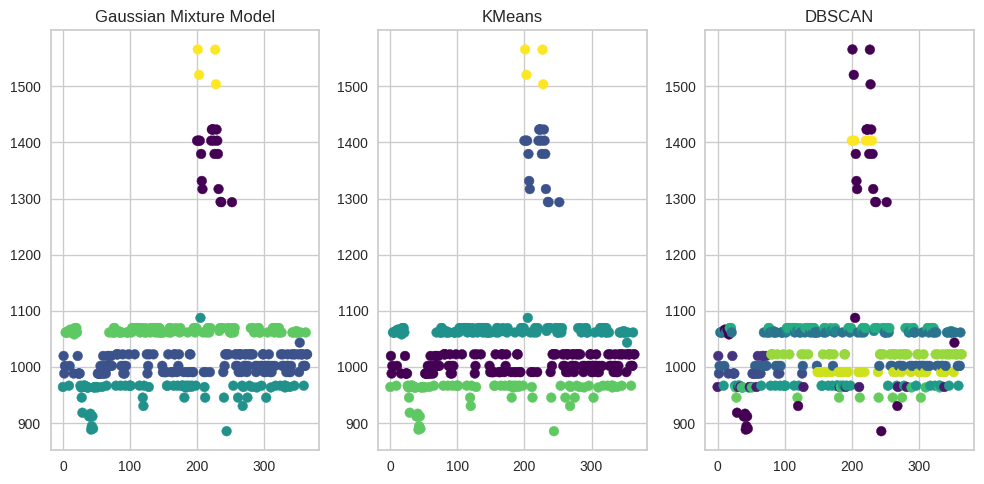

In [9]:
import matplotlib.pyplot as plt
# Biểu đồ Gaussian Mixture Model
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.scatter(range(len(selected_data)), selected_data, c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Model')
# Biểu đồ KMeans
plt.subplot(1, 3, 2)
plt.scatter(range(len(selected_data)), selected_data, c=kmeans_labels, cmap='viridis')
plt.title('KMeans')
# Biểu đồ DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(range(len(selected_data)), selected_data, c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN')
plt.tight_layout()
plt.show()

EDA


In [90]:
data_4_5.describe()

,4,5
count,365.000000,365.000000
mean,1040.228219,1040.228767
std,105.147113,105.146720
min,885.700000,885.700000
25%,988.400000,988.400000
50%,1022.600000,1022.600000
75%,1061.500000,1061.500000
max,1565.500000,1565.500000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ngày    365 non-null    object 
 1   1       365 non-null    float64
 2   2       365 non-null    float64
 3   3       365 non-null    float64
 4   4       365 non-null    float64
 5   5       365 non-null    float64
 6   6       365 non-null    float64
 7   7       365 non-null    float64
 8   8       365 non-null    float64
 9   9       365 non-null    float64
 10  10      365 non-null    float64
 11  11      365 non-null    float64
 12  12      365 non-null    float64
 13  13      365 non-null    float64
 14  14      365 non-null    float64
 15  15      365 non-null    float64
 16  16      365 non-null    float64
 17  17      365 non-null    float64
 18  18      365 non-null    float64
 19  19      365 non-null    float64
 20  20      365 non-null    float64
 21  21      365 non-null    float64
 22  22

In [14]:
data.isnull().sum()

Ngày    0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
dtype: int64

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

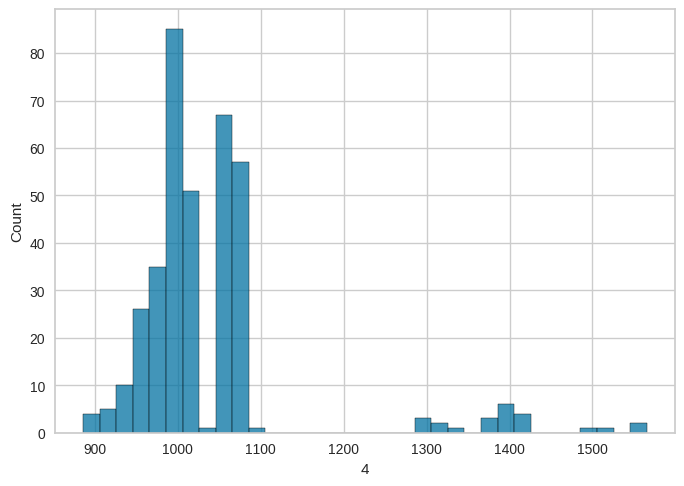

In [29]:
sns.histplot(data['4'])
plt.show()

TypeError: Invalid object type at position 200

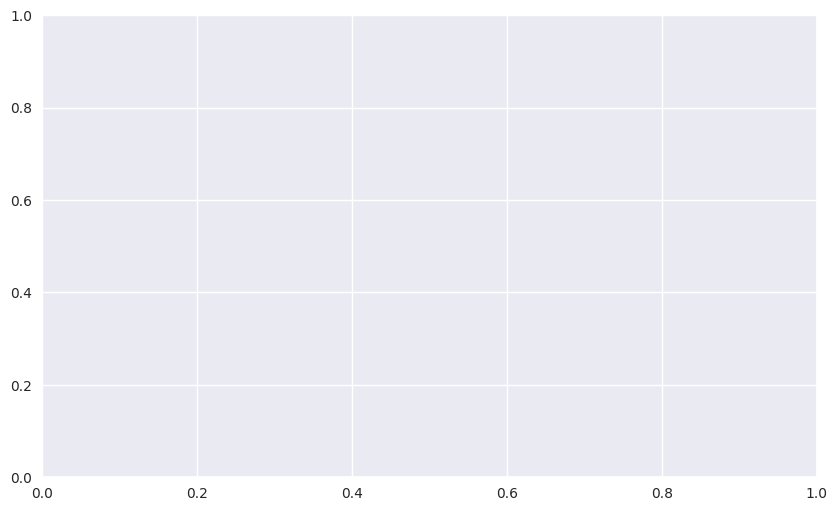

In [151]:
plt.figure(figsize=(10, 6))
sns.histplot(data['4'], bins=30, kde=True, color ='b')
plt.title('Distribution of Numerical Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

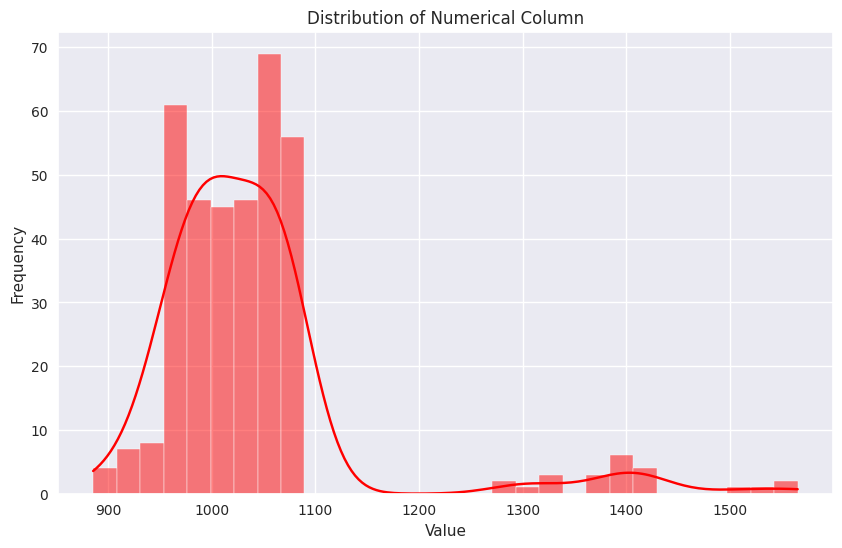

In [149]:
plt.figure(figsize=(10, 6))
sns.histplot(data['5'], bins=30, kde=True, color ='red')
plt.title('Distribution of Numerical Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler

# Chuẩn bị dữ liệu để chuẩn hóa
numerical_columns = ['4']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [48]:
data = pd.get_dummies(data, drop_first= True)

In [77]:
from sklearn.model_selection import train_test_split
X = data.drop('4', axis=1)
y = data['5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

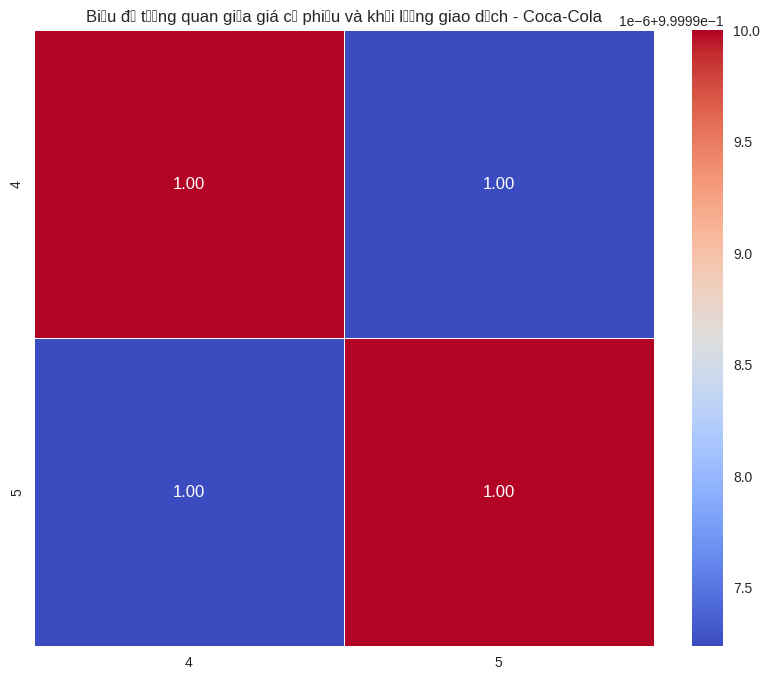

In [103]:
price_data = data[['4','5']]

# Tính ma trận tương quan
corr = price_data.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Biểu đồ tương quan giữa 4 và 5 - Coca-Cola')
plt.show()

Hệ số tương quan giữa giá 4 và 5: 0.9999972374357561


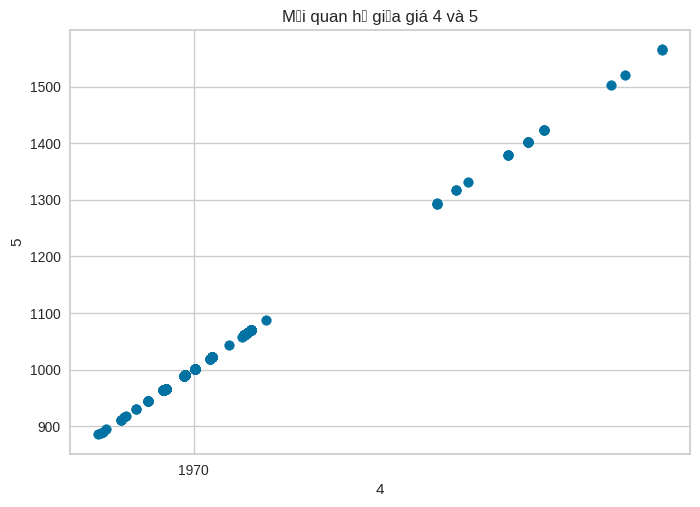

In [116]:
four_and_five = data[['4', '5']]

# Tính toán hệ số tương quan
correlation = four_and_.corr().iloc[0, 1]

# In hệ số tương quan
print("Hệ số tương quan giữa giá 4 và 5:", correlation)

# Vẽ biểu đồ scatter plot
plt.scatter(data['4'], data['5'])
plt.xlabel('4')
plt.ylabel('5')
plt.title('Mối quan hệ giữa giá 4 và 5')
plt.show()

In [117]:
data_4_5['date'] = data['Ngày']
data_4_5['date'] = pd.to_datetime(data_4_5['date'], format='%d/%m/%Y')

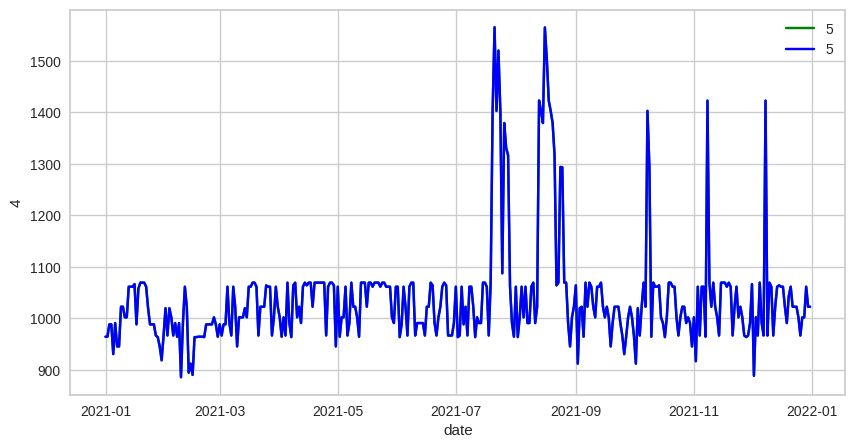

In [122]:
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(ax=ax, data=data_4_5, x="date", y="4", label='5', color ='green')
sns.lineplot(ax=ax, data=data_4_5, x="date", y="5", label='5', color ='blue')
plt.legend()
plt.show()

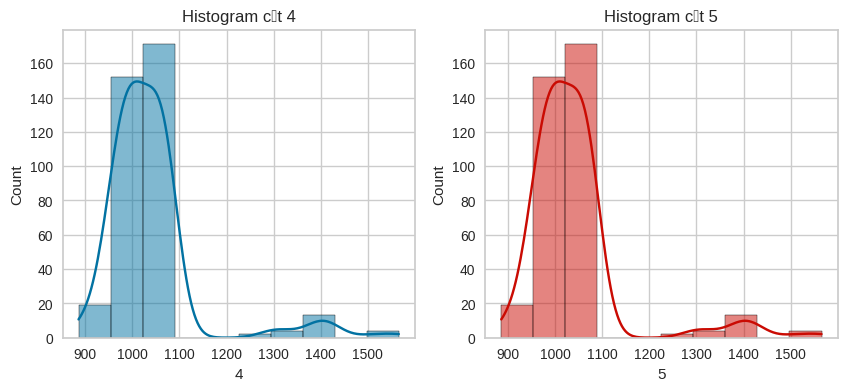

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# Biểu đồ 1
sns.histplot(data=data_4_5, x="4", bins= 10, kde=True, color ='b', ax=axes[0])
axes[0].set_title('Histogram cột 4')
# Biểu đồ 2
sns.histplot(data=data_4_5, x="5", bins= 10, kde=True, color ='r', ax=axes[1])
axes[1].set_title('Histogram cột 5')
plt.show()

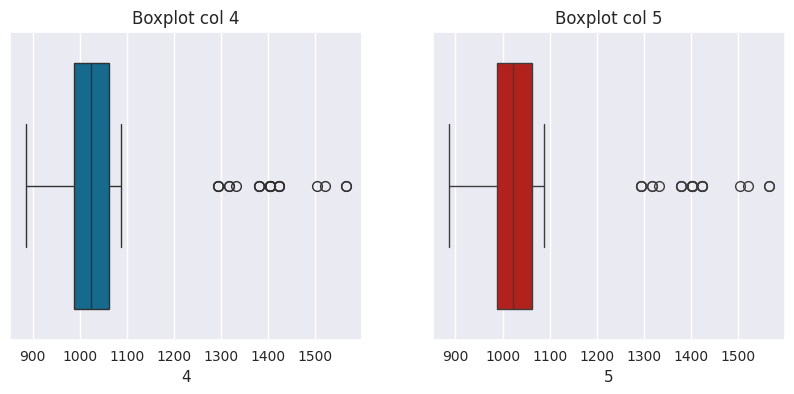

In [145]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# Biểu đồ 1
sns.boxplot(data=data_4_5, x="4", color ='b', ax=axes[0])
axes[0].set_title('Boxplot col 4')
# Biểu đồ 2
sns.boxplot(data=data_4_5, x="5", color ='r', ax=axes[1])
axes[1].set_title('Boxplot col 5')
plt.show()